# AZLyrics OPM Song Webscraper
AZLyrics is a website that provides lyrics for a wide range of songs. It features lyrics from various genres and artists, making it a popular resource for people looking to find the words to their favorite songs. The site is known for its extensive database and user-friendly interface. Users can search for lyrics by song title, artist, or album, and the site often includes additional information such as release dates and album details.

The link for AZLyrics' main menu is https://www.azlyrics.com

In [23]:
import requests as rq
import numpy as np
import time as tm, random as rd
from bs4 import BeautifulSoup as sp
import pandas as pd
from collections import Counter
import re
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

main = 'https://www.azlyrics.com'
blank = 'https://www.azlyrics.com/'
url = blank
letters = 'abcdefghijklmnopqrstuvwxyz'
filipinos = ['Dong Abay', 'Bayani Agbayani', 'Joey Albert', 'Barbie Almalbis', 'Amapola', 'Cynthia Alexander', 'Freddie Aguilar', 'Hajji Alejandro', 'Rachel Alejandro', 'Joey Ayala', 'Kyline Alcantara', 'Ogie Alcasid', 'Dely Atay-Atayan', 'Dingdong Avanzado', 'Carol Banawa', 'Edward Barber', 'Bayang Barrios', 'Carlos Balcells', 'Bassilyo', 'Heber Bartolome', 'Jimmy Bondoc', 'Jovit Baldivino', 'Christian Bautista', 'Beabadoobee', 'Zild Benitez', 'Mark Bautista', 'Janine Berdin', 'Blakdyak', 'Rico Blanco', 'Alisah Bonaobra', 'Andrea Brillantes', 'Ely Buendia', 'Noel Cabangon', 'Lito Camo', 'Ryan Cayabyab', 'Billy Crawford', 'John Cadeliña', 'Jose Mari Chan', 'Kim Chiu', 'Kean Cipriano', 'Sam Concepcion', 'Pilita Corrales', 'Teddy Corpuz', 'Roel Cortez', 'Yeng Constantino', 'Donna Cruz', 'Radha Cuadrado', 'Sharon Cuneta', 'Anne Curtis', 'Claire de la Fuente', 'Glaiza de Castro', 'Dianne dela Fuente', 'Dingdong Dantes', 'Karina Constantino David', 'JM de Guzman', 'Klarisse de Guzman', 'Mrld', 'Moira Dela Torre', 'Joey de Leon', 'Kisses Delavin', 'Enchong Dee', 'Lourd de Veyra', 'Francine Diaz', 'Elaine Duran', 'Jason Dy', 'Andrew E.', 'Kyle Echarri', 'Maymay Entrata', 'Bituin Escalante', 'Darren Espanto', 'Brenan Espartinez', 'Karla Estrada', 'Heart Evangelista', 'Seth Fedelin', 'Pops Fernandez', 'Juris Fernandez', 'Florante', 'Rose Fostanes', 'Vice Ganda', 'Maricris Garcia', 'Tootsie Guevara', 'Janno Gibbs', 'Enrique Gil', 'Nikki Gil', 'Rachelle Ann Go', 'Sarah Geronimo', 'King Girado', 'Alex Gonzaga', 'Toni Gonzaga', 'Gary Granada', 'Catriona Gray', 'Mike Hanopol', 'Solenn Heussaff', 'Agot Isidro', 'Ramon Jacinto', 'Jaya', 'RJ Jimenez', 'Jing Hidalgo Santos', 'Karylle', 'Angela Ken', 'Kyla', 'Yasmien Kurdi', 'Juan Karlos Labajo', 'Raymond Lauchengco', 'Kris Lawrence', 'Kuh Ledesma', 'Celeste Legaspi', 'Ronnie Liang', 'Xian Lim', 'Nadine Lustre', 'Chito Miranda', 'Jed Madela', 'Elmo Magalona', 'Francis Magalona', 'Bamboo Manalac', 'Jennylyn Mercado', 'Gian Magdangal', 'Jolina Magdangal', 'Michael Pangilinan', 'Maine Mendoza', 'Sam Milby', 'Lani Misalucha', 'Vina Morales', 'Morissette', 'Kitchie Nadal', 'Roselle Nava', 'Sitti Navarro', 'Vhong Navarro', 'Arthur Nery', 'Martin Nievera', 'Nina', 'Grace Nono', 'Paolo Onesa', 'Daryl Ong', 'Daniel Padilla', 'Kylie Padilla', 'Zsa Zsa Padilla', 'Manny Pacquiao', 'Inigo Pascual', 'Piolo Pascual', 'Jett Pangan', 'Imelda Papin', 'Eddie Peregrina', 'Arnel Pineda', 'Lovi Poe', 'Pokwang', 'Marcelito Pomoy', 'Richard Poon', 'Chickoy Pura', 'Yassi Pressman', 'Rico J. Puno', 'Myk Perez', 'Odette Quesada', 'Angeline Quinto', 'Zia Quizon', 'Jay R', 'Khalil Ramos', 'John Raymundo', 'April Boy Regino', 'Sheryn Regis', 'James Reid', 'Willie Revillame', 'Manilyn Reynes', 'Alden Richards', 'Ariel Rivera', 'Jamie Rivera', 'Marian Rivera', 'Olivia Rodrigo', 'Wilbert Ross', 'Karl Roy', 'Myra Ruaro', 'Sarah Geronimo', 'Lea Salonga', 'Unique', 'Janella Salvador', 'Maja Salvador', 'Sampaguita', 'Julie Anne San Jose', 'Josh Santana', 'Randy Santiago', 'Aicelle Santos', 'Erik Santos', 'Gerald Santos', 'Judy Ann Santos', 'Vehnee Saturno', 'Aiza Seguerra', 'Vic Sotto', 'Marco Sison', 'Jay-R Siaboc', 'Pepe Smith', 'Max Surban', 'KZ Tandingan', 'Daniel Tagibao', 'Ivy Violan', 'Michael V', 'Regine Velasquez', 'Nikki Valdez', 'Gary Valenciano', 'Rey Valera', 'Viktoria', 'Jessica Villarubin', 'Yoyoy Villame', 'Cris Villonco', 'Jona Viray', 'Katrina Velarde', 'Victor Wood', 'Richard Yap', 'Mitoy Yonting', 'Jake Zyrus', 'Jessa Zaragoza']
filipino = ['Andrea Brillantes'] # Remove Later

In order to make sure that the code can webscrape AZLyrics, I have to check if I can the main page of AZLyrics

200
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <meta name="robots" content="noarchive">
    <meta name="name" content="AZLyrics">
    <meta name="keywords" content="lyrics,music,song lyrics,songs,paroles">  

    <base href="//www.azlyrics.com" /> 
    <script type="text/javascript" src="//www.azlyrics.com/external.js"></script>

    <title>AZLyrics - Song Lyrics from A to Z</title>

    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css">
    <link rel="stylesheet" href="/local/az.css">

    <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
    <!--[if lt IE 9]>
      <script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min.js"></script>
      <script src="https://oss.maxcdn.com/respond/1.4.2/respond.min.js"></script>
    <![endif]-->
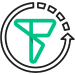
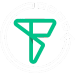

In [7]:
# Main Page
tm.sleep(1)
page = rq.get(main)
print(page.status_code)
print(page.text)

AZLyrics groups its artists alphabetically. Specific artists' links can be extracted with this. This one specifically extracts every artist in the A page.

In [24]:
url = 'https://www.azlyrics.com/a.html'
tm.sleep(rd.randint(10,15))
page = rq.get(url, timeout = 500)
xpage = page
    
soup = sp(page.text, 'html.parser')
    
# Finding Artists
div1 = soup.find_all('div', class_='col-sm-6 text-center artist-col')
soup = sp(str(div1), 'html.parser')

artists = []
arteest = ['a/andreabrillantes.html'] # Remove Later

# Ectracting Artist Links
for j in filipinos:
    art = soup.find('a', string = str(j))
    if str(art) != 'None':
        artists.append(art['href'])

print(artists)

['a/andreabrillantes.html', 'a/andrewe.html', 'a/alexgonzaga.html', 'a/angelaken.html', 'a/arthurnery.html', 'a/angelinequinto.html', 'a/aldenrichards.html', 'a/arielrivera.html', 'a/aizaseguerra.html']


You can get the names of the artists names when accessing the artists page using the links

In [26]:
for j in artists:
    # print(j)

    soup = sp(xpage.text, 'html.parser')
    ArtistName = soup.find(href = str(j))

    soup = sp(str(ArtistName), 'html.parser')
    ArtistName = str(soup.text)

    print(ArtistName)

Andrea Brillantes
Andrew E.
Alex Gonzaga
Angela Ken
Arthur Nery
Angeline Quinto
Alden Richards
Ariel Rivera
Aiza Seguerra


You can extract the links of every song in a specific artist's page. This one lists every song link in Andrea Brillantes' page.

In [28]:
url = 'https://www.azlyrics.com/a/andreabrillantes.html'
tm.sleep(rd.randint(10,15))
page = rq.get(url, timeout = 500)
soup = sp(page.text, 'html.parser')

div2 = soup.find_all("div", class_ = 'listalbum-item')

soup = sp(str(div2), 'html.parser')
ays1 = soup.find_all("a")

songs = []

# Extracting Song Links
for k in ays1:
    songs.append(k['href'])

print(songs)

['https://www.azlyrics.com/lyrics/darrenespanto/lyricbeat.html', '/lyrics/andreabrillantes/jonathanmanalooverture.html', '/lyrics/andreabrillantes/saisangpangarap.html', '/lyrics/andreabrillantes/kabataangpinoy.html', '/lyrics/andreabrillantes/hindikitaiiwan.html', '/lyrics/andreabrillantes/taratena.html', '/lyrics/andreabrillantes/boompanes.html', 'https://www.azlyrics.com/lyrics/angelaken/akonamanmuna.html', '/lyrics/andreabrillantes/bituin.html', '/lyrics/andreabrillantes/happytobeme.html', '/lyrics/andreabrillantes/makemefeelbeautiful.html', '/lyrics/andreabrillantes/nevergiveup.html', '/lyrics/andreabrillantes/payapa.html', '/lyrics/andreabrillantes/sigelang.html', '/lyrics/andreabrillantes/sparkofsummer.html']


You can get the song title by accessing the page of the song.

In [30]:
url = 'https://www.azlyrics.com/lyrics/darrenespanto/lyricbeat.html'
tm.sleep(rd.randint(10,15))
page = rq.get(url, timeout = 500)

soup = sp(page.text, 'html.parser')
bis1 = soup.find_all('b')

SongTitle = str(bis1[1].get_text())
print(SongTitle)

"Lyric & Beat"


You can also extract the lyrics of the song on the same page.

In [32]:
url = 'https://www.azlyrics.com/lyrics/darrenespanto/lyricbeat.html'
tm.sleep(rd.randint(10,15))
page = rq.get(url, timeout = 500)

justdivs = [div for div in soup.find_all('div') if not div.get('class') and not div.get('id')]

soup = sp(str(justdivs[0]), 'html.parser')
Lyrics = str(soup.text)

print(Lyrics)



Lyric and beat

Yeah, get up and dance
'Cause the lyric of your life awaits
There ain't no plans, it's yet to be written
Just take the chance and
Dance to your beat and get away
Only you can make it happen
Oh, let's make it happen
Na-na-na-na

Easy to get discouraged, be damaged
In your mind, those doubts got you tired of runnin' (Runnin')
Holdin' on despite the sadness now
Believe, it's not your fate

Get up and dance
'Cause the lyric of your life awaits
There ain't no plans, it's yet to be written
Just take the chance and
Dance to your beat and get away
Only you can make it happen
Oh, let's make it happen

Those demons in your head, want it left all unsaid
Don't let it waste your time and just live your life your way
Take a risk and just write a different lyric everyday
Don't need to drive this road on your own, you're not alone

There's no road map to the place you wanna go
(Navigate to the beat of your heart)
There's a million ways to go but no one knows
'Cause your journey's you

The album of the songs is also in the song page. However, if the song doesn't have an album it will be labeled as "No Album"

In [33]:
soup = sp(page.text, 'html.parser')
album = soup.find('div', class_='songinalbum_title')

if str(album) == 'None':
    AlbumTitle = str('No Album')
else:
    soup = sp(str(album), 'html.parser')
    bees = soup.find('b')

    soup = sp(str(bees), 'html.parser')
    AlbumTitle = str(soup.string)
    if AlbumTitle == 'You May Also Like':
        AlbumTitle = 'No Album'

print(AlbumTitle)

"Lyric And Beat, Vol. 01"


This loop connects everything into one and automates the process. The only saves for every letter it finishes. Every letter has its own file.

In [ ]:
# Alphabet Categorizing
for i in 'abcdefghijklmnoprstuvwxyz':  # Change to A-Z later

    # Data Frame
    sTitle = []
    aName = []
    aTitle = []
    sLyrics = []

    url = blank + i + '.html'
    
    tm.sleep(rd.randint(10,15))
    page = rq.get(url, timeout = 500)
    xpage = page
    
    soup = sp(page.text, 'html.parser')
    
    # Finding Artists
    div1 = soup.find_all('div', class_='col-sm-6 text-center artist-col')
    soup = sp(str(div1), 'html.parser')

    artists = []
    arteest = ['a/andreabrillantes.html'] # Remove Later

    # Ectracting Artist Links
    for j in filipinos:
        art = soup.find('a', string = str(j))
        if str(art) != 'None':
            artists.append(art['href'])

    # Finding Songs by Artist
    for j in artists:
        # print(j)

        soup = sp(xpage.text, 'html.parser')
        ArtistName = soup.find(href = str(j))

        soup = sp(str(ArtistName), 'html.parser')
        ArtistName = str(soup.text)

        url = blank + j
        tm.sleep(rd.randint(10,15))
        page = rq.get(url, timeout = 500)
        soup = sp(page.text, 'html.parser')
        
        div2 = soup.find_all("div", class_ = 'listalbum-item')

        soup = sp(str(div2), 'html.parser')
        ays1 = soup.find_all("a")

        songs = []

        # Extracting Song Links
        for k in ays1:
            songs.append(k['href'])

        # Remove Later v v v
        sung = ['https://www.azlyrics.com/lyrics/darrenespanto/lyricbeat.html', '/lyrics/andreabrillantes/jonathanmanalooverture.html'] 

        titles = []

        # Extracting Song Titles
        for k in songs:
            if str(k[0]) == 'h':
                url = k
            else:
                url = main + str(k)

            # print(url)

            tm.sleep(rd.randint(10,15))
            page = rq.get(url, timeout = 500)
            
            if page.status_code == 200:
                soup = sp(page.text, 'html.parser')
                bis1 = soup.find_all('b')

                SongTitle = str(bis1[1].get_text())

                justdivs = [div for div in soup.find_all('div') if not div.get('class') and not div.get('id')]

                soup = sp(str(justdivs[0]), 'html.parser')
                Lyrics = str(soup.text)

                soup = sp(page.text, 'html.parser')
                album = soup.find('div', class_='songinalbum_title')

                if str(album) == 'None':
                    AlbumTitle = str('No Album')
                else:
                    soup = sp(str(album), 'html.parser')
                    bees = soup.find('b')

                    soup = sp(str(bees), 'html.parser')
                    AlbumTitle = str(soup.string)
                    if AlbumTitle == 'You May Also Like':
                        AlbumTitle = 'No Album'
                
                # print(AlbumTitle)

                sTitle.append(SongTitle)
                aName.append(ArtistName)
                aTitle.append(AlbumTitle)
                sLyrics.append(Lyrics)

                titles.append(bis1[1].get_text())
        print(titles)
    df = pd.DataFrame({
        'Song': sTitle,
        'Artist': aName,
        'Album': aTitle,
        'Lyrics': sLyrics
    })
    csvname = "OPM Songs" + str(i) + ".csv"
    df.to_csv(csvname, index = False)
# print("it worked trust")

This one creates an empty csv file from a sample

In [35]:
df = pd.read_csv('OPM Songs Blank.csv')
df.to_csv(csvname, index = False)
df = pd.read_csv('OPM Songs.csv')
# print(df)

This compiles every single csv file into the empty csv file.

In [34]:
for i in 'abcdefghijklmnoprstuvxyz':
    filename = str('OPM Songs') + str(i) + str('.csv')
    edf = pd.read_csv(filename)
    edf.to_csv('OPM Songs.csv', mode='a', header=False, index=False)
df = pd.read_csv('OPM Songs.csv')
# print(df)

# Data Analysis of Songs (Only songs from pages A to O)

Due to the surplus of song in AZLyrics and delays in the code, the program ran for hours. The code was only able to exctract pages A to O before getting IP banned.

C:\Users\marty\AppData\Local\Temp\ipykernel_22100\1975704399.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SongCount', y='Artist', data=top_artists_df, palette='magma')


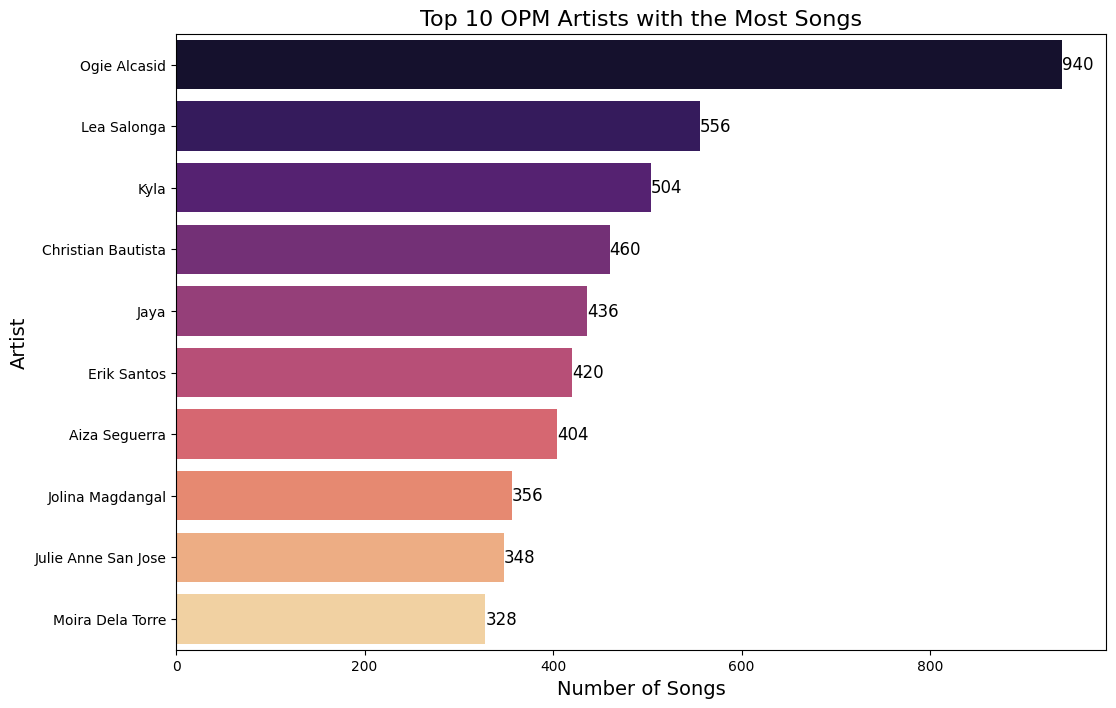

In [36]:
# Load the data
df = pd.read_csv('OPM Songs.csv')

# Group by 'Artist' and count the number of songs
artist_song_counts = df['Artist'].value_counts().head(10)

# Convert to DataFrame for easier plotting
top_artists_df = artist_song_counts.reset_index()
top_artists_df.columns = ['Artist', 'SongCount']

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='SongCount', y='Artist', data=top_artists_df, palette='magma')

# Add titles and labels
plt.title('Top 10 OPM Artists with the Most Songs', fontsize=16)
plt.xlabel('Number of Songs', fontsize=14)
plt.ylabel('Artist', fontsize=14)

# Add value labels to each bar
for index, value in enumerate(top_artists_df['SongCount']):
    plt.text(value, index, str(value), color='black', ha="left", va="center", fontsize=12)

# Show the plot
plt.show()

The graph above shows the top ten artists with the most songs. This shows that Ogie Alcasid has significantly more songs than the second artist, Lea Salonga.

C:\Users\marty\AppData\Local\Temp\ipykernel_22100\3200821569.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_artists_df, x='Number of Songs', y='Album', palette='magma')


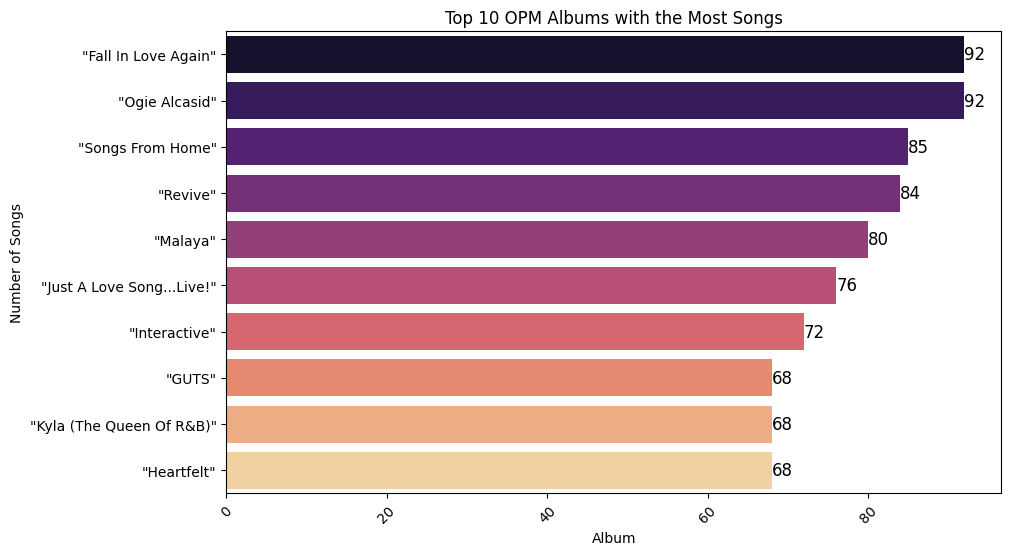

In [38]:
# Remove the specific artist
df_filtered = df[df['Album'] != 'No Album']

# Group by artist and count the number of songs
artist_song_counts = df_filtered['Album'].value_counts()

# Get the top 10 artists with the most songs
top_10_artists = artist_song_counts.head(10)

# Convert to DataFrame
top_10_artists_df = top_10_artists.reset_index()
top_10_artists_df.columns = ['Album', 'Number of Songs']

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_artists_df, x='Number of Songs', y='Album', palette='magma')
plt.title('Top 10 OPM Albums with the Most Songs')
plt.xlabel('Album')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)

# Add value labels to each bar
for index, value in enumerate(top_10_artists_df['Number of Songs']):
    plt.text(value, index, str(value), color='black', ha="left", va="center", fontsize=12)

plt.show()

The graph above shows the top ten albums with the most songs. The albums "Fall In Love Again" and "Ogie Alcasid" have the most songs. 

C:\Users\marty\AppData\Local\Temp\ipykernel_22100\3462297454.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=top_10_df, palette='magma')


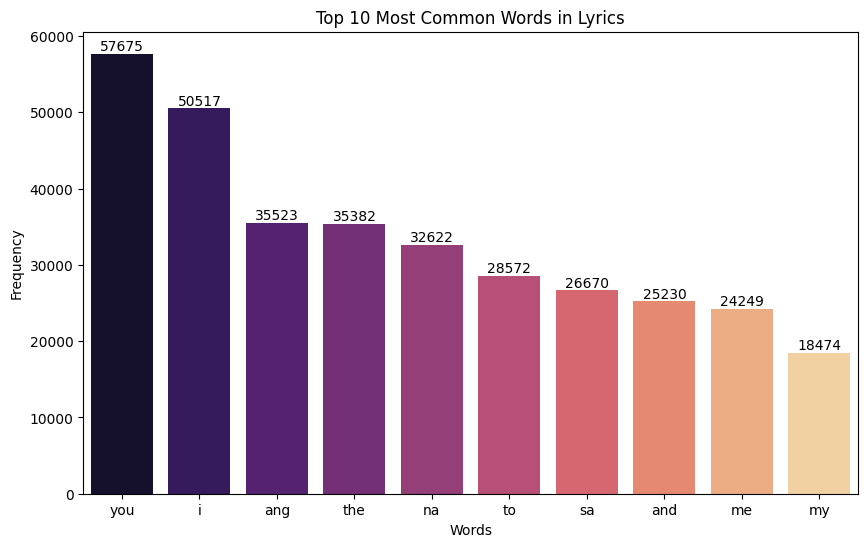

In [22]:
# Concatenate all lyrics into a single string
all_lyrics = ' '.join(df['Lyrics'].dropna())

# Clean the text by removing non-alphabetic characters and converting to lowercase
all_lyrics = re.sub(r'[^a-zA-Z\s]', '', all_lyrics).lower()

# Split the cleaned text into words
words = all_lyrics.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Create a DataFrame for the top 10 words
top_10_df = pd.DataFrame(top_10_words, columns=['Word', 'Frequency'])

# Plot the bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=top_10_df, palette='magma')
plt.title('Top 10 Most Common Words in Lyrics')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Add value labels to each bar
for index, row in top_10_df.iterrows():
    plt.text(row.name, row.Frequency, round(row.Frequency, 2), color='black', ha="center", va="bottom")

plt.show()

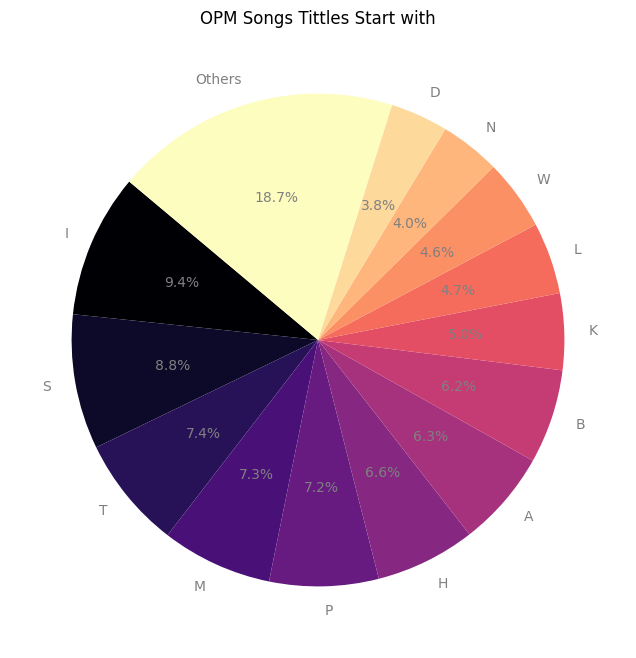

In [19]:
# Clean song titles and group alphabetically
df['Song'] = df['Song'].str.replace('"', '')  # Remove quotation marks
df['First_Letter'] = df['Song'].str[0]  # Get the first letter
song_counts = df.groupby('First_Letter').size().sort_values(ascending=False)

# Keep top 10 categories and group the rest into 'Others'
top_10_songs = song_counts.head(13)
other_count = song_counts.sum() - top_10_songs.sum()
top_10_songs['Others'] = other_count

# Plot the pie chart
colors = cm.magma(np.linspace(0, 1, len(top_10_songs)))
plt.figure(figsize=(8, 8))
plt.pie(top_10_songs, labels=top_10_songs.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color': 'grey'})
plt.title('OPM Songs Tittles Start with')
plt.show()